# Pine Labs

In [1]:
import glob
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint

import sys
sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')
from utils.helper import preprocess_tweet, sentence_to_words, lemmatization

In [2]:
df = pd.read_csv('./../../data/fintech/pine_labs/pine_labs.csv')

In [3]:
df.shape

(10483, 27)

In [4]:
pre_df = df[df['date'] < '2020-02-01']
post_df = df[df['date'] >= '2020-02-01']

## Preprocessing

In [5]:
# Preprocess tweets
pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/1398106268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/1398106268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)


In [6]:
# Create words data
pre_data = pre_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
pre_data_words = list(sentence_to_words(pre_data))

# Create words data
post_data = post_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
post_data_words = list(sentence_to_words(post_data))

In [7]:
# For pre-covid period
# Build bigram and trigram models
pre_bigram = gensim.models.phrases.Phrases(pre_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
pre_trigram = gensim.models.phrases.Phrases(pre_bigram[pre_data_words], threshold=100)

pre_bigram_model = gensim.models.phrases.Phraser(pre_bigram)
pre_trigram_model = gensim.models.phrases.Phraser(pre_trigram)

# For post-covid period
# Build bigram and trigram models
post_bigram = gensim.models.phrases.Phrases(post_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
post_trigram = gensim.models.phrases.Phrases(post_bigram[post_data_words], threshold=100)

post_bigram_model = gensim.models.phrases.Phraser(post_bigram)
post_trigram_model = gensim.models.phrases.Phraser(post_trigram)

In [8]:
# Remove stopwords
pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/4258172292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/4258172292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)


In [9]:
pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/3599064045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/3599064045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])


In [10]:
pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/1623641631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/1623641631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])


In [11]:
pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/1589984664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/1589984664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])


In [12]:
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [13]:
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [14]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [15]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.047*"hi" + 0.032*"issue" + 0.032*"resolve" + 0.031*"share" + 0.027*"like" '
  '+ 0.024*"earliest" + 0.022*"concerns" + 0.021*"touch" + 0.019*"forwarded" + '
  '0.016*"team"'),
 (1,
  '0.031*"pine_labs" + 0.016*"pinelabs" + 0.012*"pos" + 0.012*"day" + '
  '0.011*"complain" + 0.010*"getting" + 0.009*"pin" + 0.009*"read" + '
  '0.009*"machine" + 0.009*"rs"'),
 (2,
  '0.037*"team" + 0.031*"learn" + 0.020*"credit_card" + 0.019*"upi" + '
  '0.017*"net_banking" + 0.015*"win" + 0.014*"interface" + 0.014*"join" + '
  '0.012*"unified_payment" + 0.012*"future_join"'),
 (3,
  '0.028*"thanks" + 0.027*"qwikcilver" + 0.025*"card_verification" + '
  '0.024*"value_join" + 0.024*"dm" + 0.022*"pine_labs" + '
  '0.019*"contact_details" + 0.018*"customers" + 0.018*"hi" + '
  '0.018*"support_team"'),
 (4,
  '0.044*"situation" + 0.022*"pos_machine" + 0.015*"pine_labs" + 0.014*"use" + '
  '0.011*"gift" + 0.010*"smart" + 0.009*"nokia" + 0.009*"responding" + '
  '0.008*"payment" + 0.008*"watch"'),
 (5

In [16]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [17]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.049*"best" + 0.032*"congratulations" + 0.026*"hi" + 0.018*"vivo" + '
  '0.014*"fast" + 0.011*"apple_dell" + 0.010*"end" + 0.008*"axis" + '
  '0.007*"instant" + 0.007*"hai"'),
 (1,
  '0.048*"hdfc_bank" + 0.040*"axis_bank" + 0.036*"icici_bank" + 0.013*"number" '
  '+ 0.013*"motorola_mi" + 0.012*"apple_dell" + 0.012*"vivo_samsung" + '
  '0.011*"state_bank" + 0.011*"sir" + 0.011*"oppo"'),
 (2,
  '0.188*"join" + 0.030*"ans" + 0.026*"monthly_installment" + '
  '0.023*"emi_equated" + 0.023*"upi" + 0.021*"tagging" + 0.019*"thank" + '
  '0.018*"scooter_india" + 0.017*"honda_motorcycle" + '
  '0.015*"daniel_wellington"'),
 (3,
  '0.062*"dm" + 0.036*"yes" + 0.020*"pine_labs" + 0.020*"bhai" + 0.016*"thank" '
  '+ 0.013*"congrats" + 0.009*"excited" + 0.009*"congratulations" + '
  '0.008*"atb" + 0.008*"lockdown"'),
 (4,
  '0.046*"pine_labs" + 0.019*"payment" + 0.017*"money" + 0.011*"ceo" + '
  '0.010*"pinelabs" + 0.009*"company" + 0.009*"mastercard" + 0.009*"new" + '
  '0.008*"amrish_rau" 

### Evaluation

In [18]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -13.260639421645086


In [19]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -14.244848275586438


## Hyper-parameter tuning

In [20]:
def compute_coherence_values(corpus, dictionary, k, alpha, beta, texts, coherence='u_mass'):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           eta=beta)
    
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, 
                                                        texts=texts, 
                                                        dictionary=dictionary, 
                                                        coherence=coherence)
    
    return coherence_model_lda.get_coherence()

### Pre-COVID

In [21]:
grid = {}
grid['Validation_Set'] = {}

In [22]:
corpus = pre_corpus

In [23]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [24]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [25]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=pre_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=pre_df['bigram'].values.tolist(),
                                                  coherence='u_mass')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pre_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/1740 [00:00<?, ?it/s]

In [26]:
pre_df_result

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-14.170621
1,75% Corpus,2,0.01,0.31,-14.032324
2,75% Corpus,2,0.01,0.61,-13.381152
3,75% Corpus,2,0.01,0.91,-14.291820
4,75% Corpus,2,0.01,symmetric,-14.051775
...,...,...,...,...,...
1735,100% Corpus,30,asymmetric,0.01,-14.358922
1736,100% Corpus,30,asymmetric,0.31,-13.354570
1737,100% Corpus,30,asymmetric,0.61,-11.671461
1738,100% Corpus,30,asymmetric,0.91,-11.663104


In [48]:
# pre_df_result.to_csv("./../../data/fintech/pine_labs/pre.csv")

In [27]:
pre_topics_score = []
for i in pre_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = pre_df_result[(pre_df_result['Topics'] == i) & (pre_df_result['Alpha'] == 'symmetric') & (pre_df_result['Beta'] == 'symmetric')]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    pre_topics_score.append(data)

In [28]:
pre_ts_df = pd.DataFrame(pre_topics_score)
pre_ts_df.columns = ['topics', 'coherence']

In [29]:
pre_ts_df.sort_values('topics', inplace=True)
pre_ts_df.head()

,topics,coherence
0,2,-10.137893
15,3,-12.259058
27,4,-13.230776
26,5,-13.578520
25,6,-13.531137


<AxesSubplot: xlabel='topics'>

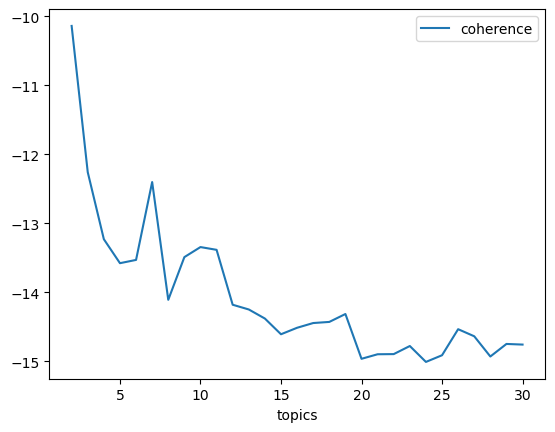

In [30]:
pre_ts_df.plot.line(x='topics', y='coherence')

In [31]:
pre_df_result[pre_df_result['Topics'] == 2]

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-14.170621
1,75% Corpus,2,0.01,0.31,-14.032324
2,75% Corpus,2,0.01,0.61,-13.381152
3,75% Corpus,2,0.01,0.91,-14.291820
4,75% Corpus,2,0.01,symmetric,-14.051775
5,75% Corpus,2,0.31,0.01,-13.804989
6,75% Corpus,2,0.31,0.31,-13.850465
7,75% Corpus,2,0.31,0.61,-14.405011
8,75% Corpus,2,0.31,0.91,-13.493466
9,75% Corpus,2,0.31,symmetric,-13.774563


### Post-COVID

In [32]:
grid = {}
grid['Validation_Set'] = {}

In [33]:
corpus = post_corpus

In [34]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [35]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [36]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=post_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=post_df['bigram'].values.tolist(),
                                                  coherence='u_mass')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    post_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/1740 [00:00<?, ?it/s]

In [37]:
post_df_result.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-10.086419
1,75% Corpus,2,0.01,0.31,-12.194296
2,75% Corpus,2,0.01,0.61,-11.464399
3,75% Corpus,2,0.01,0.91,-9.921722
4,75% Corpus,2,0.01,symmetric,-12.500446


In [47]:
# post_df_result.to_csv("./../../data/fintech/pine_labs/post.csv")

In [38]:
post_topics_score = []
for i in post_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = post_df_result[(post_df_result['Topics'] == i) & (post_df_result['Alpha'] == 'asymmetric') & (post_df_result['Beta'] == 'symmetric')]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    post_topics_score.append(data)

In [39]:
post_ts_df = pd.DataFrame(post_topics_score)
post_ts_df.columns = ['topics', 'coherence']

In [40]:
post_ts_df.sort_values('topics', inplace=True)
post_ts_df.head()

,topics,coherence
0,2,-8.226413
15,3,-8.462521
27,4,-10.322770
26,5,-9.628094
25,6,-11.139734


<AxesSubplot: xlabel='topics'>

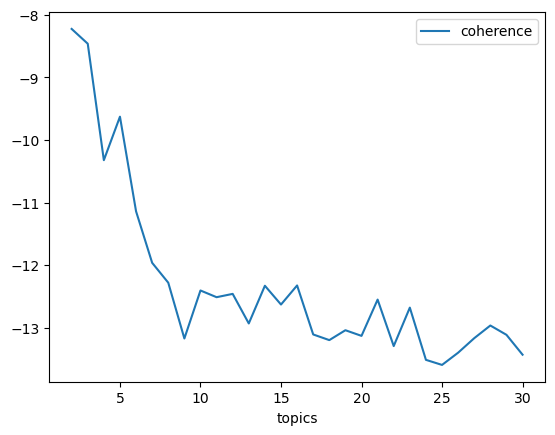

In [41]:
post_ts_df.plot.line(x='topics', y='coherence')

In [42]:
post_df_result[(post_df_result['Topics'] == 2)]

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-10.086419
1,75% Corpus,2,0.01,0.31,-12.194296
2,75% Corpus,2,0.01,0.61,-11.464399
3,75% Corpus,2,0.01,0.91,-9.921722
4,75% Corpus,2,0.01,symmetric,-12.500446
5,75% Corpus,2,0.31,0.01,-9.625675
6,75% Corpus,2,0.31,0.31,-11.228888
7,75% Corpus,2,0.31,0.61,-13.580300
8,75% Corpus,2,0.31,0.91,-11.600866
9,75% Corpus,2,0.31,symmetric,-12.065321


## Final Models

In [43]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta=0.01)

In [44]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -10.508958852398528


In [45]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta='symmetric')

In [46]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  -9.940457628626902


## Inferencing

In [49]:
def dominant_topics(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j==0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(
                    pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True
                )
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    return sent_topics_df

In [50]:
pre_df_topic_sents_keywords = dominant_topics(
   ldamodel=pre_final_lda_model, corpus=pre_corpus, texts=pre_df['bigram'].values.tolist()
)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/4013737119.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


In [51]:
post_df_topic_sents_keywords = dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist()
)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_3062/4013737119.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


In [52]:
pre_df_topic_sents_keywords['Dominant_Topic'].value_counts()

0    2687
1     748
Name: Dominant_Topic, dtype: int64

In [53]:
post_df_topic_sents_keywords['Dominant_Topic'].value_counts()

0    4193
1    2855
Name: Dominant_Topic, dtype: int64